- - - -
# Quadratic Drag With Horizontal and Vertical Motion

- - - -

Martin Veillette @ Berea College

- - - -

## Solving a first order differential equation numerically

Consider a golfball thrown with velocity 90 m/s (about 200 mi/h) at $30^\circ$ above the
horizontal from a high cliff. Find its trajectory for the first seven seconds of flight and compare
with the corresponding trajectory in a vacuum. If the same baseball was thrown with the same
initial velocity on horizontal ground how far would it travel before landing? That is, what is its
horizontal range?



We would like to solve the differential equations
$$m \frac{d v_x}{dt} = - c \sqrt{ v_x^2 + v_y^2} v_x ,$$ 
$$m \frac{d v_y}{dt} = - m g - c \sqrt{ v_x^2 + v_y^2} v_y$$

In [80]:
# import numpy library and matplotlib

import numpy as np
from numpy import cos, sin, sqrt, arange, pi

# to plot our result
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14
#get_ipython().magic('matplotlib inline') # inline plotting

In [81]:
# parameters
dt = 0.0001  # time interval in seconds
tmax = 7.00 # final time in seconds
g = 9.80  # acceleration in m/s^2
m = 0.040 # mass in kg
gamma = 0.25 # drag coefficient in N s^2 /m^4
diameter = 0.03 # diameter of projectile (m) 
c = gamma* diameter**2  # coefficient of friction in kg s/m^2 

timeRange = arange(0, tmax, dt)

# initial conditions
initialAngle = 30.0 * (pi/180)  # launching angle in radians
speed = 90.0  # initial speed in m/s
vx = speed * cos (initialAngle) # initial horizontal velocity
vy = speed * sin (initialAngle) # initial vertical velocity
x = 0  # initial horizontal position
y = 0  # initial vertical position

# storing arrays
vxs = []
vys = []

xs = []
ys = []

# loop over time
for t in timeRange:
     ax = - c/m * sqrt( vx**2 +vy**2)*vx
     ay = - g -c/m * sqrt( vx**2 +vy**2)*vy
    
     x = x + vx * dt + 1/2 * ax * dt**2
     y = y + vy * dt + 1/2 * ay * dt**2
    
     vx = vx + ax * dt
     vy = vy + ay * dt

     # storing results 
     vxs.append(vx)
     vys.append(vy)
    
     xs.append(x)
     ys.append(y)
        

In [82]:
print('terminal speed', np.sqrt( m*g/c), 'm/s')
print('characteristic time', np.sqrt(m/(c*g)), 's')

terminal speed 41.73993558 m/s
characteristic time 4.2591771 s


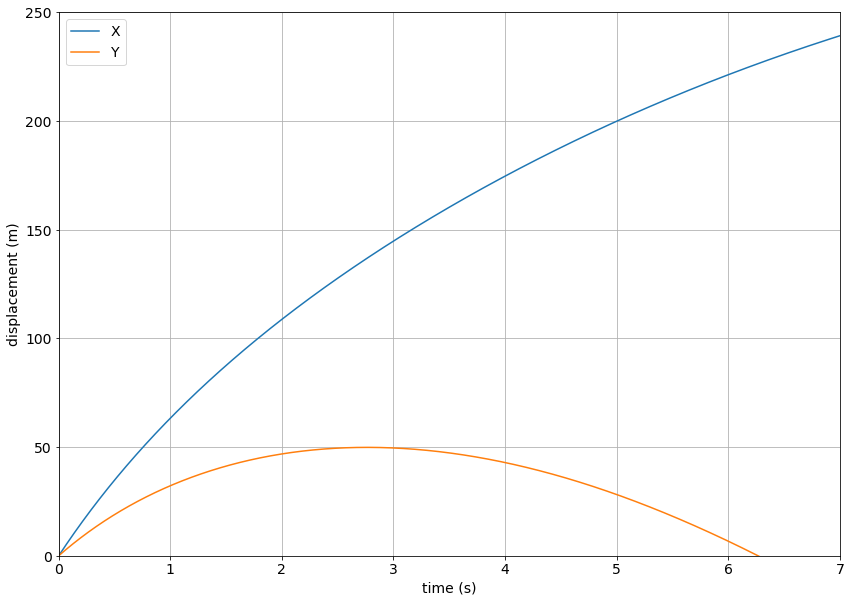

In [83]:
# plot the solution 
lineX,=plt.plot(timeRange, xs, label='X')
lineY,=plt.plot(timeRange, ys, label='Y')
plt.legend(handles=[lineX, lineY])
plt.ylabel('displacement (m)')
plt.xlabel('time (s)')
plt.grid()
plt.axis([0,7,0,250])
plt.savefig('position.png')
plt.show()

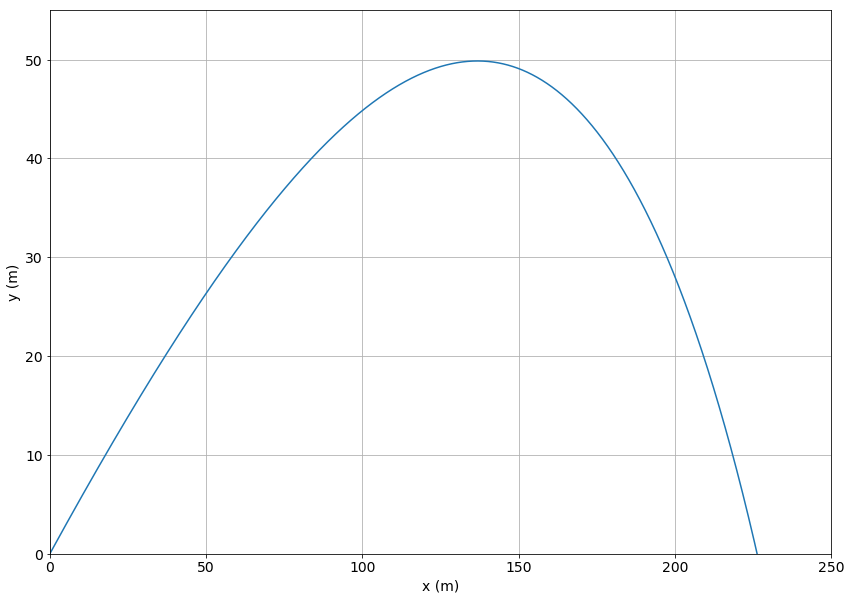

In [84]:
# trajectory 
plt.plot(xs,ys)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.axis([0,250,0,55])
plt.grid()
plt.savefig('trajectory.png')


We clearly see that the range is approximatley 230 m. Can we be more precise?

In [85]:
r= np.vstack([xs,ys])

In [86]:
# maximum height
maxHeight=np.max(ys)
maxHeight

49.862925725028134

In [87]:
yIndex=ys.index(maxHeight)
yIndex

27634

In [88]:
np.argmax(ys)

27634

In [89]:
# time at maximum height
timeRange[yIndex]

2.7634000000000003

In [90]:
# x position at maximum height
xs[yIndex]

136.86680386656957

In [91]:
# create numpy arrays
x=np.array(xs)
y=np.array(ys)

In [92]:
xIndex=np.min(np.where(y<0))

In [93]:
timeOfFlight = timeRange[xIndex]
timeOfFlight

6.2669000000000006

In [94]:
xRange = x[xIndex]
xRange

226.35423321680793

In [95]:
x[xIndex-1]

226.35236536847648